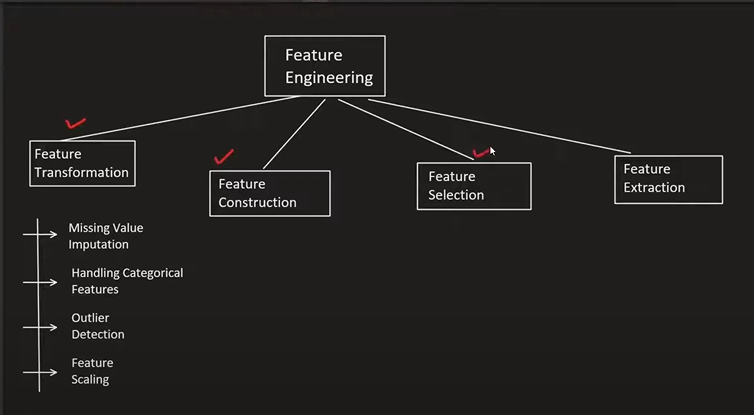

### Feature Construction and Splitting

Feature construction is a manual process that is done by the intuition of the ML engineer building the model which will be useful for the model training

We need to sometimes split the same column into two different columns for getting tidy data.

For example, If the cabin no is like A302, B403, etc., here the letter represents  the class of the cabin and the no. of the cabin

In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

import seaborn as sns

In [2]:
df = pd.read_csv('train.csv')[['Age','Pclass','SibSp','Parch','Survived']]

In [3]:
df.sample(3)

,Age,Pclass,SibSp,Parch,Survived
630,80.0,1,0,0,1
15,55.0,2,0,0,1
264,NaN,3,0,0,0


In [4]:
df=df.dropna()

In [5]:
X=df.drop(columns='Survived')
y=df['Survived']

In [6]:
X.sample(3)

,Age,Pclass,SibSp,Parch
734,23.0,2,0,0
434,50.0,1,1,0
262,52.0,1,1,1


In [8]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))*100

69.33333333333333

### Applying Feature Construction

In [10]:
X['Family_size']=X['SibSp']+X['Parch']+1

In [11]:
X.sample(3)

,Age,Pclass,SibSp,Parch,Family_size
424,18.0,3,1,1,3
774,54.0,2,1,3,5
421,21.0,3,0,0,1


In [12]:
def myfunc(num):
    if num == 1:
        #alone
        return 0
    elif num >1 and num <=4:
        # small family
        return 1
    else:
        # large family
        return 2

In [13]:
X['Family_type'] = X['Family_size'].apply(myfunc)

In [14]:
X.head()

,Age,Pclass,SibSp,Parch,Family_size,Family_type
0,22.0,3,1,0,2,1
1,38.0,1,1,0,2,1
2,26.0,3,0,0,1,0
3,35.0,1,1,0,2,1
4,35.0,3,0,0,1,0


In [15]:
X.drop(columns=['SibSp','Parch','Family_size'],inplace=True)

Better accuracy

In [16]:
np.mean(cross_val_score(LogisticRegression(),X,y,scoring='accuracy',cv=20))*100

70.03174603174602

### Feature Splitting

In [17]:
df = pd.read_csv('train.csv')

In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [20]:
df['Title'] = df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

In [21]:
df['Name'].str.split(', ', expand=True)[1].str.split('.', expand=True)[0]

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: 0, Length: 891, dtype: object

In [22]:
df[['Title','Name']]

,Title,Name
0,Mr,"Braund, Mr. Owen Harris"
1,Mrs,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,Miss,"Heikkinen, Miss. Laina"
3,Mrs,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,Mr,"Allen, Mr. William Henry"
...,...,...
886,Rev,"Montvila, Rev. Juozas"
887,Miss,"Graham, Miss. Margaret Edith"
888,Miss,"Johnston, Miss. Catherine Helen ""Carrie"""
889,Mr,"Behr, Mr. Karl Howell"


In [23]:
(df.groupby('Title').mean()['Survived']).sort_values(ascending=False)

TypeError: agg function failed [how->mean,dtype->object]

In [24]:
df['Is_Married'] = 0
df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1

C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_13092\2254989826.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df['Is_Married'].loc[df['Title'] == 'Mrs'] = 1
C:\Users\SYED NAVEED\AppData\Local\Temp\ipykernel_13092\2254989826.py:2: Se

In [25]:
df['Is_Married']

0      0
1      1
2      0
3      1
4      0
      ..
886    0
887    0
888    0
889    0
890    0
Name: Is_Married, Length: 891, dtype: int64